In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("FIL-USD", start="2021-05-01", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-30,149.734940,164.475845,149.691803,163.893555,163.893555,1827451213
2021-05-01,163.835815,167.265472,161.229935,164.376724,164.376724,1100844275
2021-05-02,164.198639,166.657379,157.041824,162.581589,162.581589,1041944826
2021-05-03,162.471619,163.853241,158.964005,160.305832,160.305832,1034803009
2021-05-04,160.216782,160.416306,135.802155,140.924927,140.924927,1731008815


In [5]:
initial_data['Adj Close'].head()

Date
2021-04-30    163.893555
2021-05-01    164.376724
2021-05-02    162.581589
2021-05-03    160.305832
2021-05-04    140.924927
Name: Adj Close, dtype: float64

In [6]:
data =  initial_data['Adj Close']

In [7]:
data.head()

Date
2021-04-30    163.893555
2021-05-01    164.376724
2021-05-02    162.581589
2021-05-03    160.305832
2021-05-04    140.924927
Name: Adj Close, dtype: float64

In [8]:
data.tail()

Date
2022-04-26    17.277328
2022-04-27    17.721230
2022-04-28    18.113510
2022-04-29    17.309917
2022-04-30    14.330068
Name: Adj Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CF3385710>],
      dtype=object)

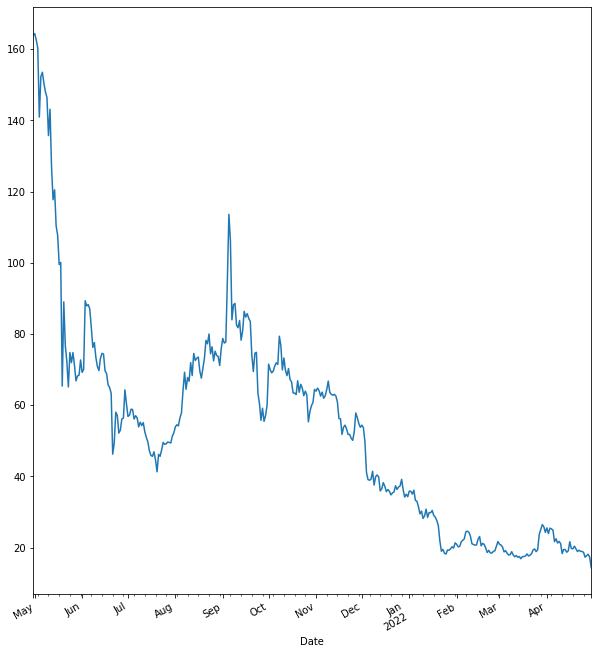

In [10]:
data.plot(figsize=(10, 12), subplots=True)

In [11]:
data.describe().round(2)

count    366.00
mean      52.85
std       30.00
min       14.33
25%       24.45
50%       53.84
75%       69.70
max      164.38
Name: Adj Close, dtype: float64

In [12]:
data.diff().head()

Date
2021-04-30          NaN
2021-05-01     0.483170
2021-05-02    -1.795135
2021-05-03    -2.275757
2021-05-04   -19.380905
Name: Adj Close, dtype: float64

In [13]:
data.diff().describe().round(2)

count    365.00
mean      -0.41
std        4.50
min      -34.73
25%       -1.59
50%       -0.24
75%        0.97
max       23.65
Name: Adj Close, dtype: float64

In [14]:
data.pct_change().round(4).head()

Date
2021-04-30       NaN
2021-05-01    0.0029
2021-05-02   -0.0109
2021-05-03   -0.0140
2021-05-04   -0.1209
Name: Adj Close, dtype: float64

In [15]:
data=pd.DataFrame(data)

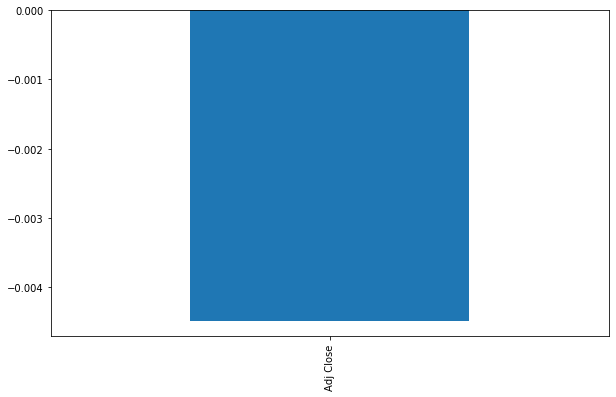

In [16]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-04-30,NaN
2021-05-01,0.0029
2021-05-02,-0.0110
2021-05-03,-0.0141
2021-05-04,-0.1289


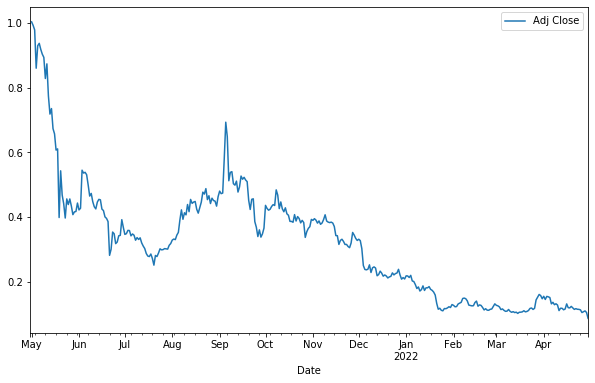

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [19]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-05-02,162.581589
2021-05-09,146.416107
2021-05-16,107.695923
2021-05-23,65.106728
2021-05-30,68.422081


In [20]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2021-04-30,163.893555
2021-05-31,72.690613
2021-06-30,60.372555
2021-07-31,52.200218
2021-08-31,75.947006


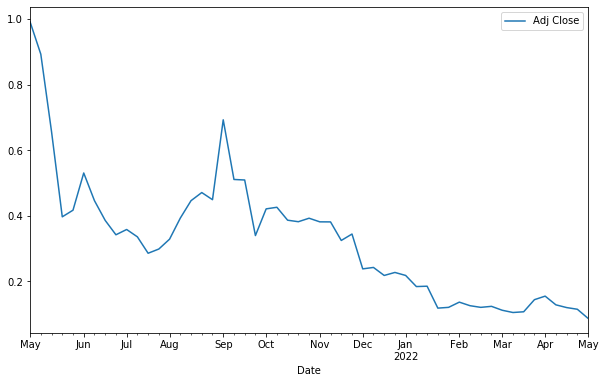

In [21]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

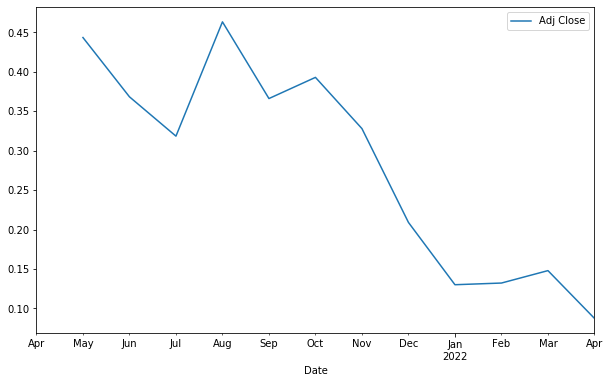

In [22]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# VOLATILITY 

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = yf.download("FIL-USD", start="2021-08-01", end="2022-08-30")

[*********************100%***********************]  1 of 1 completed


In [25]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-30,17.308384,17.922056,12.433394,14.330068,14.330068,706324643
2022-05-01,14.321812,15.589860,14.220774,15.133082,15.133082,669626751
2022-05-02,15.132587,15.266424,14.187154,14.628806,14.628806,389646921
2022-05-03,14.627483,14.963784,14.284508,14.619692,14.619692,276394810
2022-05-04,14.613044,15.041932,14.584158,14.775144,14.775144,314688672


In [26]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.03328733305105666,
 0.010113245348466566,
 -0.005604071507784401,
 0.04202491221046422,
 0.024620304394352997]

In [27]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.03274530542990312,
 0.010062448675122727,
 -0.005619833230647463,
 0.041165851116844475,
 0.02432210922525894]

In [28]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return is %.8f and The annualized volatility is %.8f' % (nr,nv))

The annualized normal return is -0.80647744 and The annualized volatility is 0.95073254


In [29]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and The annulized volatility is %.8f' % (lr,lv))

The annualized log return is -1.26214039 and The annulized volatility is 0.95697752


# BINOMIAL TREE

In [50]:
import numpy as np
import os

In [51]:
S0 = 14.775144              # spot stock price
K = 14.00000               # strike
T = 1/52                   # maturity 
r = 0.0166                 # risk free rate 
sig = 0.96                 # diffusion coefficient or volatility
N = 4                      # number of periods or number of time steps  
payoff = "put"  

In [52]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [53]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [54]:
S

array([[14.775144  , 15.79210818, 16.87906939, 18.04084547, 19.2825859 ],
       [ 0.        , 13.82366925, 14.775144  , 15.79210818, 16.87906939],
       [ 0.        ,  0.        , 12.9334666 , 13.82366925, 14.775144  ],
       [ 0.        ,  0.        ,  0.        , 12.10059033, 12.9334666 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 11.32134877]])

In [55]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48396419788412576

In [56]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.0665334 ],
       [0.        , 0.        , 0.        , 0.        , 2.67865123]])

# EUROPOEAN OPTION

In [57]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.47351535, 0.14652441, 0.        , 0.        , 0.        ],
       [0.        , 0.78025705, 0.28396499, 0.        , 0.        ],
       [0.        , 0.        , 1.24582525, 0.55032549, 0.        ],
       [0.        , 0.        , 0.        , 1.89829241, 1.0665334 ],
       [0.        , 0.        , 0.        , 0.        , 2.67865123]])

In [58]:
print('European ' + payoff, str( V[0,0]))

European put 0.4735153498771435


# MONTE CARLO SIMULATION

In [61]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [62]:
T = 1/52
r = 0.0166 
sigma = 0.96
S0 = 14.775144
K = 14.000000

In [63]:
S = mcs_simulation_np(1000)

In [64]:
S = np.transpose(S)
S

array([[14.775144  , 14.73760536, 14.69976036, ..., 17.50532509,
        17.46870324, 17.45170574],
       [14.775144  , 14.75913677, 14.78664724, ..., 14.95093636,
        14.91245232, 14.88959286],
       [14.775144  , 14.86866231, 14.84271672, ..., 14.89594024,
        14.84040863, 14.85215375],
       ...,
       [14.775144  , 14.64548619, 14.62763896, ..., 16.71300945,
        16.64947889, 16.66290499],
       [14.775144  , 14.72606834, 14.77530817, ..., 15.03161983,
        15.04270718, 14.98937915],
       [14.775144  , 14.69735275, 14.70989113, ..., 13.6445622 ,
        13.62307649, 13.78452487]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

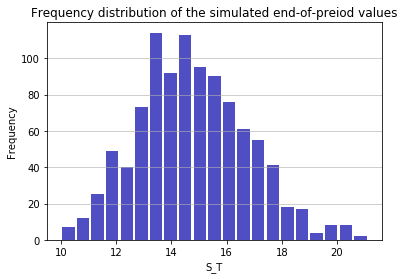

In [65]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [66]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.4459483871173645


# BLACK SCHOLES MODEL

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [68]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [70]:
euro_option_bs(14.775144, 14.000000, 1/52,0.0166, 0.96, 'put')

0.43596040233834454

In [71]:
S = np.linspace(13.000000,15.000000,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],14.775144, 1/52, 0.0166, 0.96, 'put')

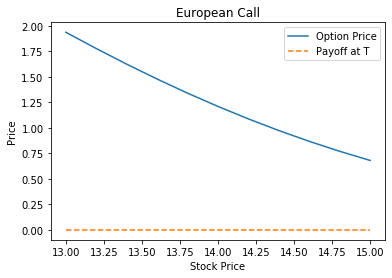

In [72]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# GREEKS 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [74]:
def delta(S, K, T, r, q, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [75]:
delta(14.775144, 14.000000, 1/52, 0.0166, 0, 0.96, 'put')

-0.3178381947836618

In [76]:
S = np.linspace(13.000000,15.000000,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
        Delta_Put [i] = delta(S[i], 14.775144, 1/52, 0.0166, 0, 0.96, 'put')

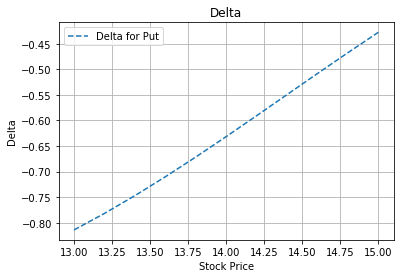

In [77]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [78]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [79]:
gamma(14.775144, 14.000000, 1/52,0.0166, 0, 0.96, 'put')

0.1812892026019911

In [80]:
S = np.linspace(13.000000,15.0000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 14.775144, 1/52, 0.0166, 0, 0.96, 'put')

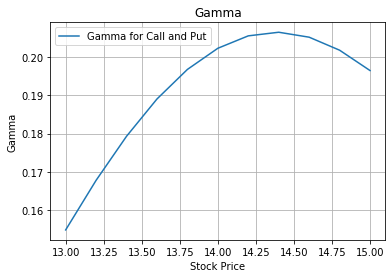

In [81]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Theta

In [82]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [83]:
theta(14.775144, 14.000000, 1/52,1.66, 0, 0.96, 'put')

22.183418616399543

In [84]:
T = np.linspace(13.0000,15.0000,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
        Theta_Put [i] = theta(14.775144, 14.0000, T[i], 1.66, 0, 0.96, 'put')
        

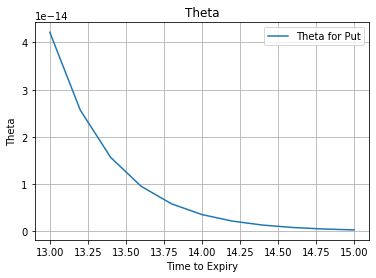

In [85]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [87]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [88]:
rho(14.775144, 14.0000, 1/52,1.66, 0, 0.96, 'put')

-0.07344005002065422

In [89]:
r = np.linspace(13.0000,15.0000,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
        Rho_Put [i] = rho(14.775144, 14.0000, 1/52, 1.66, 0, 0.96, 'put')

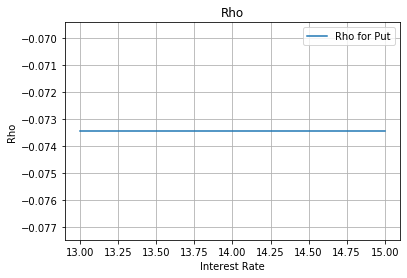

In [90]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [91]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [92]:
vega(14.775144, 14.0000, 1/52,1.66, 0, 0.96, 'put')

0.6347785856817577

In [93]:
vol = np.linspace(13.0000,15.0000,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(14.775144, 14.0000, 1/52,1.66, 0, vol[i], 'put')

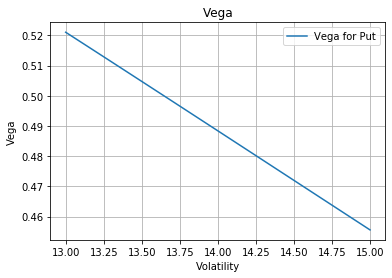

In [94]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega' )
plt.legend(['Vega for Put'])